In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Chapter 06

This chapter formalizes the concept of $d$-separation and introduces the concept of estimand. We learn how $d$-separation in a graph translates to regression analysis. Next, we focus on estimands. We define basic yet powerful estimands: back-door and front-door criteria. Next, we introduce other criteria and the concept of Pearl’s $do$-calculus. Finally, we translate our new knowledge into Python code and perform a couple of exercises to solidify our new knowledge.

## Visualizations

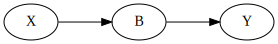

In [15]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_00')

graph

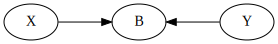

In [18]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'YB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_01')

graph

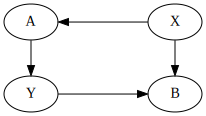

In [27]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1,1!', '3,1!', '3,0!', '1, 0!']

edges = ['XB', 'YB', 'XA', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_02')

graph

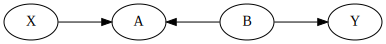

In [34]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1.5,0!', '0,0!', '3,0!', '4.5,0!']

edges = ['XA', 'BA', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_03')

graph

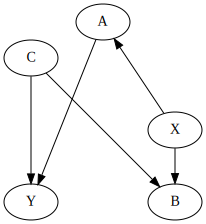

In [26]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y', 'C']
positions = ['2,2.5!', '3,1!', '3,0!', '1, 0!', '1,2!']

edges = ['XA', 'XB', 'CB', 'CY', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_04')

graph

## Estimand first!

In [74]:
# Commute example
t = [22.1, 23.7, 25.2, 20.0, 21.8]

In [75]:
np.mean(t)

22.56

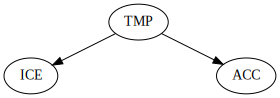

In [80]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['ICE', 'TMP', 'ACC']
positions = ['0,0!', '1.5,.75!', '3,0!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edge('TMP', 'ICE')
graph.edge('TMP', 'ACC')

graph.render(f'img/ch_06_icecream')

graph

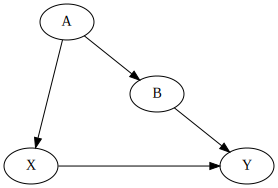

In [187]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(['XY', 'AX', 'AB', 'BY'])

graph.render(f'img/ch_06_equivalent_estimands_00')

graph

In [191]:
?graph.edge

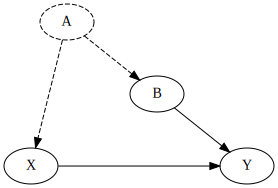

In [211]:
graph = graphviz.Digraph(format='png', engine='neato')


nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('A', style='dashed')

graph.edges(['XY', 'BY'])
graph.edge('A', 'X', style='dashed')
graph.edge('A', 'B', style='dashed')

graph.render(f'img/ch_06_equivalent_estimands_01')

graph

## Front-door criterion

In [212]:
from dowhy.causal_model import CausalModel

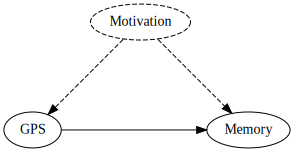

In [219]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Memory', 'Motivation']
positions = ['0,0!', '3,0!', '1.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Memory')

graph.render(f'img/ch_06_gps_01')

graph

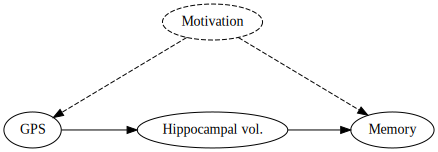

In [226]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Hippocampal vol.', 'Memory', 'Motivation']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Hippocampal vol.')
graph.edge('Hippocampal vol.', 'Memory')

graph.render(f'img/ch_06_gps_02')

graph

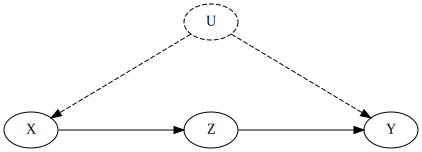

In [790]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Z', 'Y', 'U']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('X', 'Z')
graph.edge('Z', 'Y')

graph.render(f'img/ch_06_gps_03')

graph

### Front-door in practice

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# First, we'll build a structural causal model (SCM)
class GPSMemorySCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5)
        self.u_y = stats.norm(scale=2)
        self.u_z = stats.norm(scale=2)
        self.u = stats.truncnorm(0, np.infty, scale=4)
        
    def sample(self, sample_size=100, treatment_value=None):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_x = self.u_x.rvs(sample_size)
        u_y = self.u_y.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        u = self.u.rvs(sample_size)
        
        if treatment_value:
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u
            
        hippocampus = -0.6*gps + 0.25*u_z
        memory = 0.7*hippocampus + 0.25*u
        
        return gps, hippocampus, memory
    
    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [78]:
# Instantiate the SCM
scm = GPSMemorySCM()

# Generate observational data
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

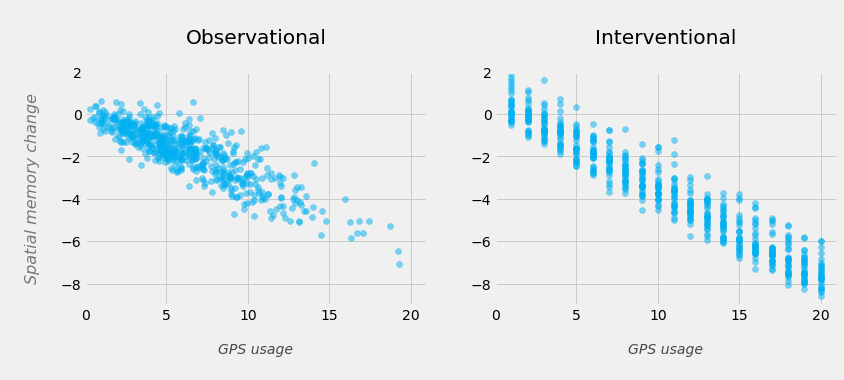

In [79]:
# Plot observational data
plt.figure(figsize=(12, 4))

# Observational
plt.subplot(121)
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nObservational\n')
plt.xlabel('\nGPS usage', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')


# Interventional
plt.subplot(122)

plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nInterventional\n')
plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')

plt.show()

### Naive model 1

In [80]:
lr_naive = LinearRegression()
lr_naive.fit(
    X=gps_obs.reshape(-1, 1), 
    y=memory_obs
)

LinearRegression()

### Experimental model

In [81]:
treatments_unpack = np.array(treatments).flatten()
results_unpack = np.array(experiment_results).flatten()

lr_experiment = LinearRegression()
lr_experiment.fit(
    X=treatments_unpack.reshape(-1, 1), 
    y=results_unpack
)

LinearRegression()

In [82]:
X_test = np.arange(1, 21).reshape(-1, 1)

preds_naive = lr_naive.predict(X_test) 
preds_experiment = lr_experiment.predict(X_test)

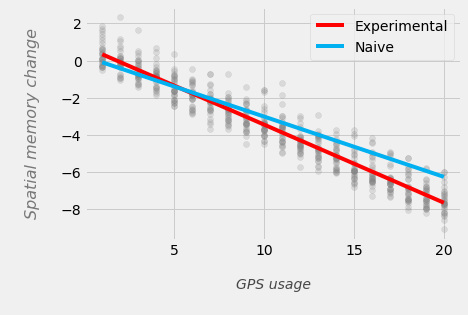

In [83]:
plt.scatter(treatments, experiment_results, alpha=.2, color='gray')
plt.plot(X_test, preds_experiment, label='Experimental', color=COLORS[1])
plt.plot(X_test, preds_naive, label='Naive', color=COLORS[0])

plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')

plt.legend()
plt.show()

In [84]:
# Get coefficients
print(f'Naive model:\n{lr_naive.coef_[0]}\n')
print(f'Experiemntal model:\n{lr_experiment.coef_[0]}')

Naive model:
-0.3246130171160016

Experiemntal model:
-0.4207238110947806


#### The Linear Bridge to The Causal Promised Land

In [ ]:
from dowhy.causal_model import CausalModel
from sklearn.linear_model import LinearRegression

In [ ]:
# Model E(Z|X)
lr_zx = LinearRegression()
lr_zx.fit(
    X=gps_obs.reshape(-1, 1),
    y=hippocampus_obs
)

# Model E(Y|X, Z)E(X)
lr_yxz = LinearRegression()
lr_yxz.fit(
    X=np.array([gps_obs,hippocampus_obs]).T,
    y=memory_obs
)

# Compute the expected causal effect
lr_zx.coef_[0] * lr_yxz.coef_[1]

### Instrumental variables

**NOTE**: In the book (p. 121) one of the formulas for regression models is <font color='red'>**incorrect**</font>. 

The book says:

_________


*To calculate the causal effect of X on Y in a linear case, all we need to do is fit two linear regression
models and compute the ratio of their coefficients!*

*The two models are as follows:*

*• Y ~ Z*

<font color='red'>*• Y ~ X*</font>

_____________


The <font color='green'>**correct**</font> formulas should be:

_____________

*The two models are as follows:*

*• Y ~ Z*

<font color='green'>*• X ~ Z*</font>

__________________


The **code example** below uses the <font color='green'>**correct formulas**</font>.

In [ ]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['Z', 'X', 'Y', 'U']
positions = ['0,0!', '1.5,0!', '5,0!', '3.25,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('Z', 'X')
graph.edge('X', 'Y')

graph.render(f'img/ch_06_instrumental_00')

graph

In [104]:
# First, we'll build a structural causal model (SCM)
class InsrumentalSCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_xy = stats.norm()
        self.u_z = stats.norm()
        
    def sample(self, sample_size=100):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_xy = self.u_xy.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        
        z = u_z
        x = 0.7*z + 0.2*u_xy
        y = 0.8*x + 0.1*u_xy
        
        return z, x, y

In [105]:
# Instantiate the SCM and sample
instr_scm = InsrumentalSCM()
z, x, y = instr_scm.sample(1000)

In [112]:
# Fit regression 1
lr_yz = LinearRegression()
lr_yz.fit(X=z.reshape(-1, 1), y=y)

# Fit regression 2
lr_xz = LinearRegression()
lr_xz.fit(X=z.reshape(-1, 1), y=x)

LinearRegression()

In [120]:
# Compute the causal effect
causal_effect = lr_yz.coef_[0] / lr_xz.coef_[0]
causal_effect

In [121]:
# Sanity check
random_z = np.random.randn()

random_z * .7 * .8, random_z * .7 * causal_effect

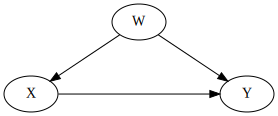

In [4]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'W', 'Y']
positions = ['1,0!', '2.5,1!', '4,0!']

edges = ['XY', 'WY', 'WX']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(r'C:\Users\aleks\OneDrive\Pulpit\BCKDR.png')

graph